In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).


In [38]:
calif_house = fetch_california_housing(as_frame=True)
data = calif_house['data']
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [39]:
data.insert(loc=len(data.columns) , column='MedHouseVal', value=calif_house['target']) #соединяем таблицу и таргет
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


###2. Проведите первичный анализ.


a.Проверьте данные на пропуски. Удалите в случае обнаружения.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
#пропусков нет


b.*Нормализуйте один из признаков.

In [30]:
#времянка, удали
data = pd.DataFrame({'MedInc': [8.3252, 8.3014, 7.2574], 'HouseAge': [41.0, 21.0, 52.0], 'AveRooms': [6.984127, 6.238137, 8.288136],
                     'AveBedrms': [1.023810, 0.971880, 1.073446], 'Population': [322.0, 2401.0, 496.0], 'AveOccup': [2.555556, 2.109842, 2.802260],
                     'Latitude': [37.88, 37.86, 39.48], 'Longitude': [-122.23, -122.24, -122.25], 'MedHouseVal': [4.526, 3.585, 3.521]})

In [31]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.24,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,39.48,-122.25,3.521


In [41]:
#очень большие колебания в численности населения, поэтому лучше нормализовать именно этот признак
from sklearn import preprocessing
norm_popul = preprocessing.normalize([data['Population']])
data['Population'] = norm_popul[0]
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,0.001231,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.009180,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.001896,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.002133,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.002160,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,0.003231,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,0.001361,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,0.003850,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,0.002833,2.123209,39.43,-121.32,0.847


### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.


In [42]:
x = data[['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',]]
y = data[['MedHouseVal']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 4. Обучите модель регрессии на обучающем множестве.


In [44]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [45]:
predictions = model.predict(X_test)

In [46]:
model.score(X_train, y_train)

0.6118358981586478

### 6. Обучите дерево решений на обучающем множестве.

In [47]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()

In [48]:
predictions = regr.fit(x, y)

a. Повторите п. 5 для полученной модели.

In [49]:
regr.score(X_train, y_train) #думаю, она переобучилась

1.0

In [68]:
regr = DecisionTreeRegressor(max_depth=2)
predictions = regr.fit(x, y)
regr.score(X_train, y_train)

0.4517918267356583

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным.

In [69]:
from sklearn import tree

In [70]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 5.04
|   |--- feature_0 <= 3.07
|   |   |--- value: [1.36]
|   |--- feature_0 >  3.07
|   |   |--- value: [2.09]
|--- feature_0 >  5.04
|   |--- feature_0 <= 6.82
|   |   |--- value: [2.91]
|   |--- feature_0 >  6.82
|   |   |--- value: [4.22]



In [71]:
column_names = data.columns.tolist()
column_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

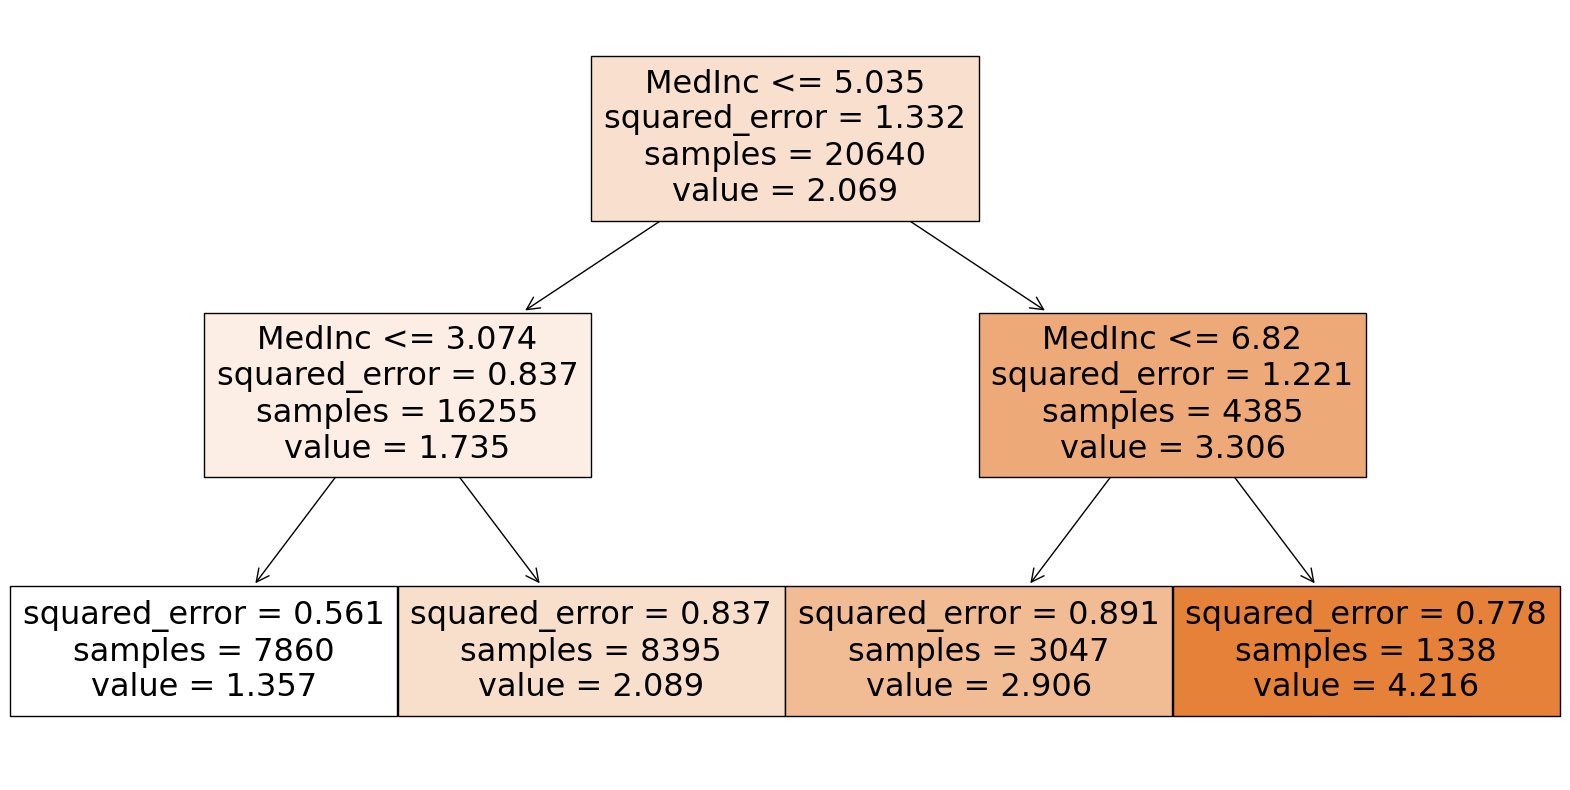

In [73]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(regr, feature_names=column_names, filled=True)

### 7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

In [127]:
regr = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=6) #max_depth - глубина

In [128]:
predictions = regr.fit(x, y)

In [ ]:
#max_leaf_nodes − int или None, необязательно, по умолчанию = Non
#Этот параметр позволит вырастить дерево с max_leaf_nodes наилучшим способом. Значение по умолчанию равно none, что означает, что количество конечных узлов будет неограниченным.


a. Повторите п. 5 для полученной модели.


In [129]:
predictions = regr.fit(x, y)
regr.score(X_train, y_train)

0.5146097656038847

### 8. Сформулируйте выводы по проделанной работе.
**a. Сравните точность двух моделей.**


Точность модели линейной регрессии: 0.6118358981586478

Точность дерева решений: 1 (из-за переобучения)

Точность дерева решений с параметрами: 0.5146097656038847

**b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?**

Деревья решений отлично подходят, если стоит задача наглядно продемонстрировать алгоритм, так как при построении использует интуитивно понятное условие Если...то...

Могу предположить, что деревья решений лучше подходят для задачи кластеризации (когда уже заранее известны кластеры, к которым надо отнести объекты). Думаю, что в этом случае проще оптимизировать модель и не допускать переобучения.

Плюсы деревьев решений:
- лёгкая интерпретация результатов

Минусы деревьев решений:
- не подходит для сложных задач
- склонность к переобучению